# CNN: VGG-16

### CA4 @ AI Course

*Full Name:* Borna Foroohari

*SID:* 810101480

In this part of the assignment we want to do an image classification task using PyTorch on CIFAR10 dataset.

#### Google Colab Setup

In [1]:
from google.colab import drive
import os


drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Neural Network'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
os.chdir(GOOGLE_DRIVE_PATH)
print(os.listdir('./'))

Mounted at /content/drive
['AI-F03-CA4.pdf', 'VGG-16', 'NN-from-scratch', 'data']


## Introduction

A Convolutional Neural Network (CNN) architecture is a deep learning model designed for processing structured grid-like data, such as images. It consists of multiple layers, including convolutional, pooling, and fully connected layers. CNNs are highly effective for tasks like image classification, object detection, and image segmentation due to their hierarchical feature extraction capabilities.

## VGG-16

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.

The ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is an annual competition in computer vision where teams tackle tasks including object localization and image classification. VGG16, proposed by Karen Simonyan and Andrew Zisserman in 2014, achieved top ranks in both tasks, detecting objects from 200 classes and classifying images into 1000 categories. This model achieves 92.7% top-5 test accuracy on the ImageNet dataset which contains 14 million images belonging to 1000 classes.


![](https://i.postimg.cc/qR2ghvVg/VGG-16.png)

The architecture of VGG-16 — Image from [Researchgate.net](https://www.researchgate.net/publication/321829624_Leaf_App_Leaf_recognition_with_deep_convolutional_neural_networks)


Here’s a breakdown of the VGG-16 architecture:

1. Convolutional Layers (64 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 64 filters each and a filter size of 3×3.
    - Same padding is applied to maintain spatial dimensions.
2. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
3. Convolutional Layers (128 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 128 filters each and a filter size of 3×3.
4. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
5. Convolutional Layers (256 filters, 3×3 filters, same padding):
    - Three consecutive convolutional layers with 256 filters each and a filter size of 3×3.
6. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
7. Convolutional Layers (512 filters, 3×3 filters, same padding):
    - Three sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
8. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
9. Convolutional Layers (512 filters, 3×3 filters, same padding):
    - Three sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
10. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
11. Flattening:
    - Flatten the output feature map.
12. Fully Connected Layers:
    - Three fully connected layers with ReLU activation.
    - First layer with input size 512 and output size 4096.
    - Second layer with input size 4096 and output size 4096.
    - Third layer with input size 4096 and output size 10, corresponding to the 10 classes in the CIFAR10 dataset.
    - Softmax activation is applied to the output of the third fully connected layer for classification.

This architecture follows the specifications provided, including the use of ReLU activation function and the final fully connected layer outputting probabilities for 10 classes using softmax activation.

source: [geeksforgeeks](https://www.geeksforgeeks.org/vgg-16-cnn-model/)

## Model

Define your VGG16 model here from scratch (You are not allowed to use the existing models in pytorch)

In [2]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
from torchvision import transforms

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Update classifier to match CIFAR-10 input dimensions (32x32 images)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),  # Adjusted for CIFAR-10 output size
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [3]:
from torchsummary import summary
summary(VGG16(), input_size=(3, 32, 32));

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

Now, let's train and test our model on the CIFAR-10 dataset.

## Device

Set device to work with (GPU or CPU)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Transforms & Dataset & Dataloader

Here, you should download and load the dataset with the desire transforms. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261)),
])

In [7]:
# inverse the normilize transform to restore the original data
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = torch.tensor(mean).view(3, 1, 1)
        self.std = torch.tensor(std).view(3, 1, 1)

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be unnormalized.
        Returns:
            Tensor: Unnormalized image.
        """
        return tensor * self.std + self.mean

norminv = UnNormalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261))

In [8]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

BATCH_SIZE = 128

initial_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainset, valset = random_split(initial_trainset, [45000, 5000])

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 5 random images from each class in different columns

- **Hint**:  You can use `plt.subplots` for visualization

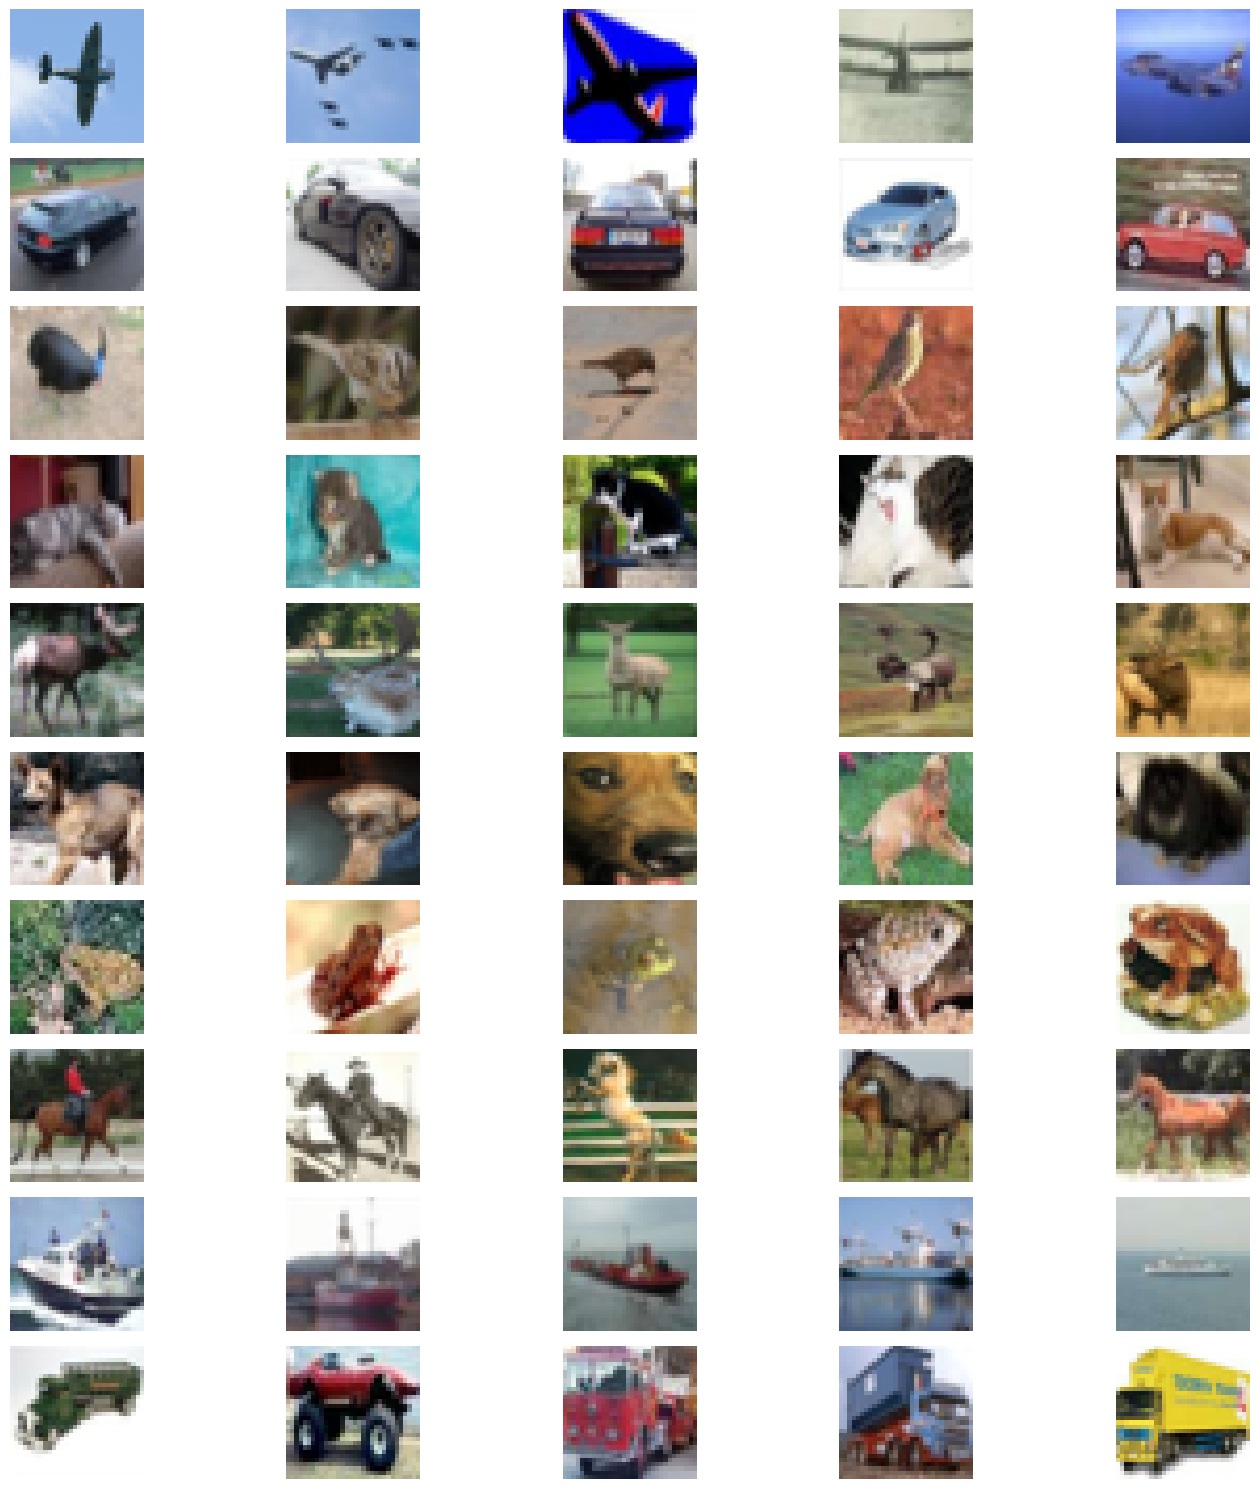

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision
from torchvision import transforms

def visualize_images(dataset, class_labels, images_per_class=5):
    fig, axs = plt.subplots(len(class_labels), images_per_class, figsize=(15, 15))

    label_indices_map = {label_idx: np.flatnonzero(np.array(dataset.targets) == label_idx) for label_idx in range(len(class_labels))}

    for label_idx, selected_indices in label_indices_map.items():
        sampled_indices = random.sample(selected_indices.tolist(), images_per_class) 

        for pos_idx in range(images_per_class):
            data_idx = sampled_indices[pos_idx]
            image_tensor, _ = dataset[data_idx]
            unnormalized_image = norminv(image_tensor) 

            if unnormalized_image.dim() == 4:
                unnormalized_image = unnormalized_image.squeeze(0)
            numpy_image = unnormalized_image.permute(1, 2, 0).numpy()
            numpy_image = np.clip(numpy_image, 0, 1)

            axs[label_idx, pos_idx].imshow(numpy_image)
            axs[label_idx, pos_idx].axis('off')
            if pos_idx == 0:
                axs[label_idx, pos_idx].set_ylabel(class_labels[label_idx], fontsize=10)

    plt.tight_layout()
    plt.show()

visualize_images(initial_trainset, classes)


## Train

### Model instantiation

Create an instance of your model and move it to `device`

In [10]:
net = VGG16(num_classes=10)
net = net.to(device)

### Criterion & Optimizater

Define `criterion` and `optimizer`

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### Train loop

Train your model

Tasks:
- Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Train accuracy
  - Validation loss
  - Validation accuracy
- Save train/validation loss and accuracy (of each epoch) in an array for later usage

In [12]:
import time

def train_epoch(net, criterion, optimizer, dataloader, device):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  

        optimizer.zero_grad()

        outputs = net(inputs) 
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc


def eval_epoch(net, criterion, dataloader, device):
    net.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad(): 
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)  
            loss = criterion(outputs, labels) 

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)  
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc



In [13]:
import time

epochs = 30
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

# Train loop
for epoch in range(epochs):
    start_time = time.time()
    train_loss, train_acc = train_epoch(net, criterion, optimizer, trainloader, device)
    val_loss, val_acc = eval_epoch(net, criterion, valloader, device)
    end_time = time.time()

    print(f"Epoch [{epoch + 1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% - "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% - "
          f"Time: {end_time - start_time:.2f}s")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

Epoch [1/30] - Train Loss: 2.2286, Train Acc: 12.58% - Val Loss: 1.9451, Val Acc: 22.34% - Time: 25.13s
Epoch [2/30] - Train Loss: 1.8572, Train Acc: 23.82% - Val Loss: 1.7808, Val Acc: 28.92% - Time: 23.25s
Epoch [3/30] - Train Loss: 1.6949, Train Acc: 32.85% - Val Loss: 1.5246, Val Acc: 41.00% - Time: 23.20s
Epoch [4/30] - Train Loss: 1.4430, Train Acc: 45.01% - Val Loss: 1.3392, Val Acc: 49.14% - Time: 23.50s
Epoch [5/30] - Train Loss: 1.2467, Train Acc: 54.07% - Val Loss: 1.2065, Val Acc: 56.58% - Time: 22.67s
Epoch [6/30] - Train Loss: 1.1003, Train Acc: 60.83% - Val Loss: 1.0422, Val Acc: 63.36% - Time: 23.33s
Epoch [7/30] - Train Loss: 0.9794, Train Acc: 65.60% - Val Loss: 1.0474, Val Acc: 63.42% - Time: 23.86s
Epoch [8/30] - Train Loss: 0.8880, Train Acc: 69.30% - Val Loss: 0.9761, Val Acc: 67.68% - Time: 22.85s
Epoch [9/30] - Train Loss: 0.8165, Train Acc: 72.26% - Val Loss: 0.9149, Val Acc: 68.82% - Time: 23.43s
Epoch [10/30] - Train Loss: 0.7301, Train Acc: 75.18% - Val Loss

### Visualize Loss and Accuracy plot

Using the arrays that you have (from task 2 in the above section), visualize two plots: Accuracy plot (train and validation together) and Loss plot (train and validation together)

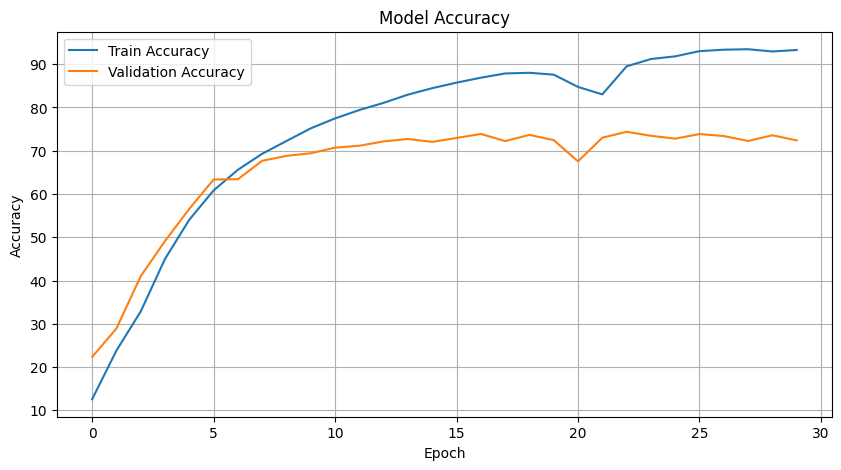

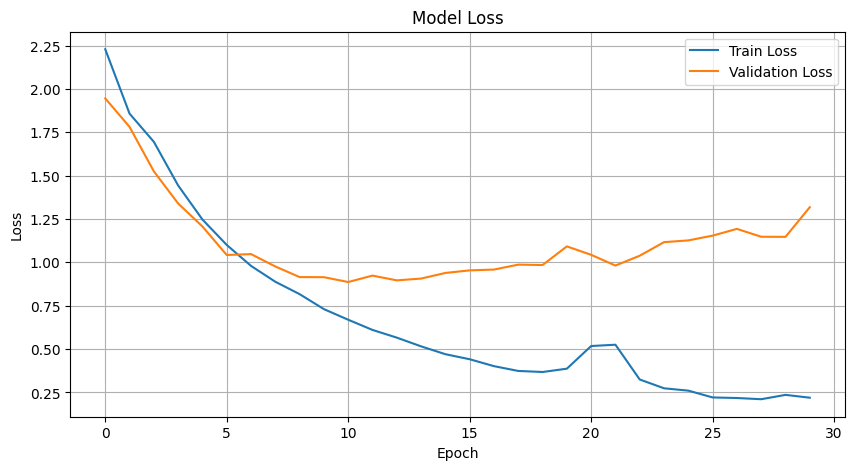

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have). Our goal is to reach an accuracy above `70%`

In [15]:
def evaluate_test(model, criterion, loader, device):
    model.eval()
    total_samples = 0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            predictions = outputs.argmax(dim=1)
            total_samples += targets.size(0)
            correct_predictions += (predictions == targets).sum().item()

    accuracy = (correct_predictions / total_samples) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate_test(net, criterion, testloader, device)


Test Accuracy: 73.89%


Done!